In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#to move from notebooks/example_notebook.ipynb
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries


In [4]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")


In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [6]:
print("using the prefered method(SQLAlchemy)")
df

using the prefered method(SQLAlchemy)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [7]:
# Count missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [8]:
#handling the missing value

import user_overview_EDA as uoe
uoe.handle_missing_values(df, unique_identifiers=['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI'])



Checking column 'Bearer Id' for NaN values...
NaN values in 'Bearer Id': 991
Checking column 'IMSI' for NaN values...
NaN values in 'IMSI': 9
Checking column 'MSISDN/Number' for NaN values...
NaN values in 'MSISDN/Number': 495
Checking column 'IMEI' for NaN values...
NaN values in 'IMEI': 0


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [9]:
#function to treat outliers
uoe.treat_outliers(df)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244958.75,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244958.75,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244958.75,2.082008e+14,3.373182e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244958.75,2.082014e+14,3.373182e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244958.75,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.00,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.00,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.00,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.00,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [10]:
#Aggregate Engagement Metrics Per Customer
import User_Engagment as ue
ue.aggregate_engagement_metrics(df)

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
0,3.360301e+10,805,7.587595e+07,3.717881e+11,3.291387e+10,4.047020e+11
1,3.360301e+10,2,1.203250e+05,5.597741e+08,8.268901e+07,6.424631e+08
2,3.360301e+10,1,1.357180e+05,8.093193e+08,5.469388e+07,8.640132e+08
3,3.360301e+10,1,1.099060e+05,7.312636e+07,4.917803e+07,1.223044e+08
4,3.360301e+10,1,1.359680e+05,4.042386e+08,4.253264e+07,4.467712e+08
...,...,...,...,...,...,...
89378,3.370000e+10,1,1.716720e+05,7.784317e+08,4.898112e+07,8.274129e+08
89379,3.370000e+10,1,9.498000e+03,5.465595e+08,3.784142e+07,5.844009e+08
89380,3.370000e+10,1,6.604500e+04,4.484382e+08,3.262826e+07,4.810664e+08
89381,3.370000e+10,1,2.142090e+05,3.530826e+08,4.167086e+07,3.947535e+08


In [11]:
# Report Top 10 Customers
user_metrics= ue.aggregate_engagement_metrics(df)
ue.report_top_users(user_metrics)

Top 10 Users by Sessions Frequency:
       MSISDN/Number  Bearer Id     Dur. (ms)  Total DL (Bytes)  \
89382   3.373182e+10      23255  2.362458e+09      1.051044e+13   
0       3.360301e+10        805  7.587595e+07      3.717881e+11   
12874   3.362632e+10         18  4.005256e+06      7.301517e+09   
5811    3.361489e+10         17  3.898234e+06      8.156743e+09   
12530   3.362578e+10         17  4.136008e+06      7.770043e+09   
36316   3.365973e+10         16  3.491076e+06      7.081602e+09   
75484   3.367588e+10         15  3.330728e+06      7.309542e+09   
64290   3.366716e+10         13  3.112420e+06      5.052068e+09   
65      3.360313e+10         12  2.853893e+06      4.540607e+09   
677     3.360452e+10         12  2.778630e+06      5.096079e+09   

       Total UL (Bytes)  Total Traffic (Bytes)  
89382      9.561861e+11           1.146662e+13  
0          3.291387e+10           4.047020e+11  
12874      6.696507e+08           7.971167e+09  
5811       6.894830e+08       

In [12]:
# Normalize Metrics
ue.normalize_metrics(user_metrics)

,Bearer Id,Dur. (ms),Total Traffic (Bytes)
0,0.034575,3.211445e-02,0.035291
1,0.000043,4.790746e-05,0.000053
2,0.000000,5.442315e-05,0.000072
3,0.000000,4.349721e-05,0.000008
4,0.000000,5.452898e-05,0.000036
...,...,...,...
89378,0.000000,6.964210e-05,0.000069
89379,0.000000,9.955765e-07,0.000048
89380,0.000000,2.493132e-05,0.000039
89381,0.000000,8.764755e-05,0.000032


In [13]:
normalized_metrics= ue.normalize_metrics(user_metrics)
ue.apply_kmeans(normalized_metrics, k=3)


0        2
1        0
2        0
3        0
4        0
        ..
89378    0
89379    0
89380    0
89381    0
89382    1
Name: Cluster, Length: 89383, dtype: int32

        Bearer Id                                  Dur. (ms)                \
              min    max          mean     sum           min           max   
Cluster                                                                      
0               1     18      1.392309  124446  7.146000e+03  4.136008e+06   
1           23255  23255  23255.000000   23255  2.362458e+09  2.362458e+09   
2             805    805    805.000000     805  7.587595e+07  7.587595e+07   

                                    Total Traffic (Bytes)                \
                 mean           sum                   min           max   
Cluster                                                                   
0        1.389005e+05  1.241507e+10          3.324901e+07  8.846226e+09   
1        2.362458e+09  2.362458e+09          1.146662e+13  1.146662e+13   
2        7.587595e+07  7.587595e+07          4.047020e+11  4.047020e+11   

                                     
                 mean           sum  
Clus

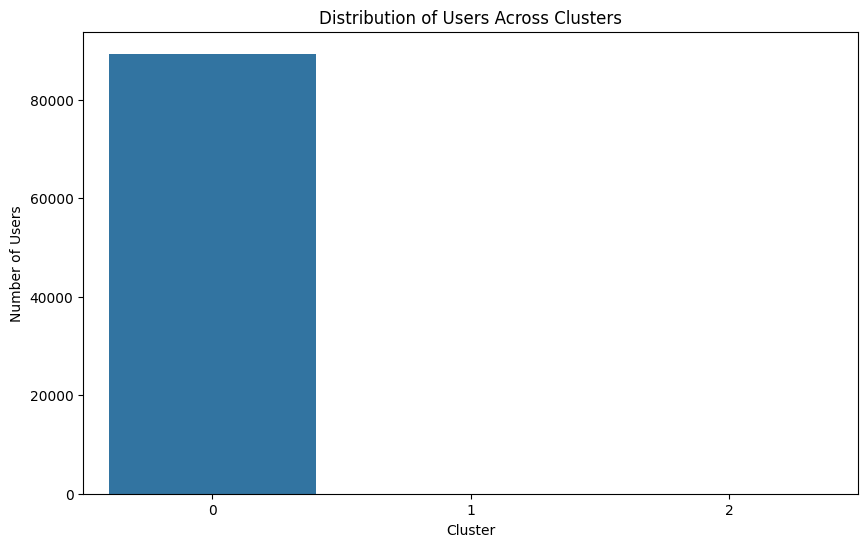

In [14]:
# Analyze clusters
normalized_metrics = ue.normalize_metrics(user_metrics)  # Normalize the metrics

ue.analyze_clusters(user_metrics, normalized_metrics)  # Analyze the clusters


In [15]:
 ue.top_application_users(df)



Top 10 Users for Social Media DL (Bytes):
MSISDN/Number
3.373182e+10    4.183059e+10
3.360301e+10    1.447948e+09
3.362632e+10    4.274384e+07
3.365973e+10    3.490044e+07
3.361489e+10    2.774974e+07
3.362578e+10    2.656412e+07
3.366716e+10    2.375375e+07
3.366907e+10    2.347705e+07
3.360313e+10    2.277668e+07
3.365849e+10    2.269567e+07
Name: Social Media DL (Bytes), dtype: float64
Top 10 Users for Google DL (Bytes):
MSISDN/Number
3.373182e+10    1.339892e+11
3.360301e+10    4.685631e+09
3.362632e+10    1.161065e+08
3.362578e+10    1.079047e+08
3.361489e+10    9.394171e+07
3.365973e+10    9.095855e+07
3.367588e+10    8.300299e+07
3.360313e+10    7.394206e+07
3.366716e+10    7.170783e+07
3.366021e+10    7.142176e+07
Name: Google DL (Bytes), dtype: float64
Top 10 Users for Email DL (Bytes):
MSISDN/Number
3.373182e+10    4.180078e+10
3.360301e+10    1.448789e+09
3.361489e+10    3.360721e+07
3.362632e+10    3.340478e+07
3.362578e+10    3.189541e+07
3.365973e+10    2.990765e+07
3.366

{'Social Media DL (Bytes)': MSISDN/Number
 3.373182e+10    4.183059e+10
 3.360301e+10    1.447948e+09
 3.362632e+10    4.274384e+07
 3.365973e+10    3.490044e+07
 3.361489e+10    2.774974e+07
 3.362578e+10    2.656412e+07
 3.366716e+10    2.375375e+07
 3.366907e+10    2.347705e+07
 3.360313e+10    2.277668e+07
 3.365849e+10    2.269567e+07
 Name: Social Media DL (Bytes), dtype: float64,
 'Google DL (Bytes)': MSISDN/Number
 3.373182e+10    1.339892e+11
 3.360301e+10    4.685631e+09
 3.362632e+10    1.161065e+08
 3.362578e+10    1.079047e+08
 3.361489e+10    9.394171e+07
 3.365973e+10    9.095855e+07
 3.367588e+10    8.300299e+07
 3.360313e+10    7.394206e+07
 3.366716e+10    7.170783e+07
 3.366021e+10    7.142176e+07
 Name: Google DL (Bytes), dtype: float64,
 'Email DL (Bytes)': MSISDN/Number
 3.373182e+10    4.180078e+10
 3.360301e+10    1.448789e+09
 3.361489e+10    3.360721e+07
 3.362632e+10    3.340478e+07
 3.362578e+10    3.189541e+07
 3.365973e+10    2.990765e+07
 3.366546e+10    

C:\Users\HP\OneDrive\Desktop\KAIM\kaim-week-02\scripts\User_Engagment.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_apps.index, y=top_3_apps.values, palette="viridis")


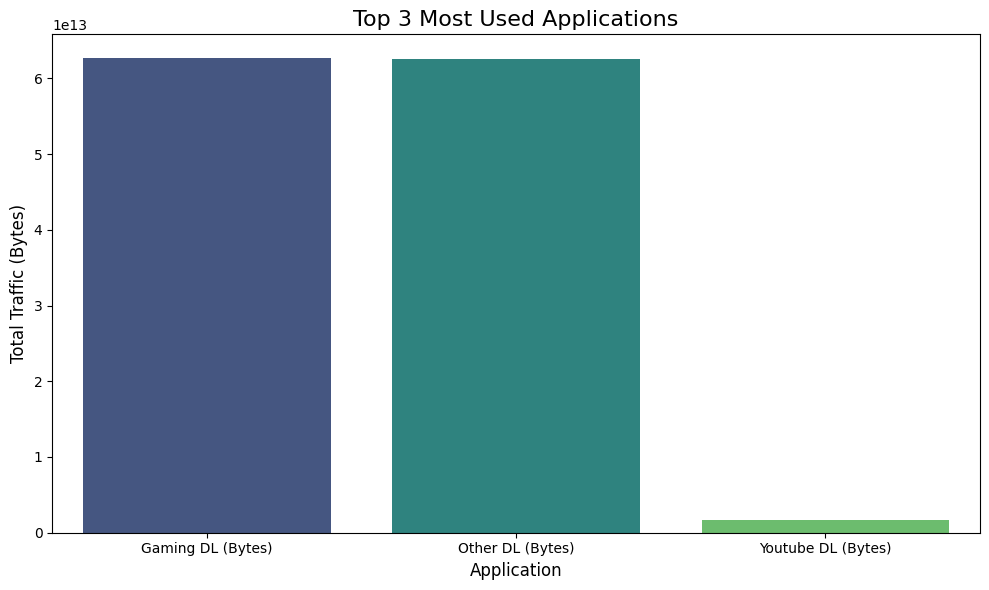

In [16]:
ue.plot_top_applications(df)

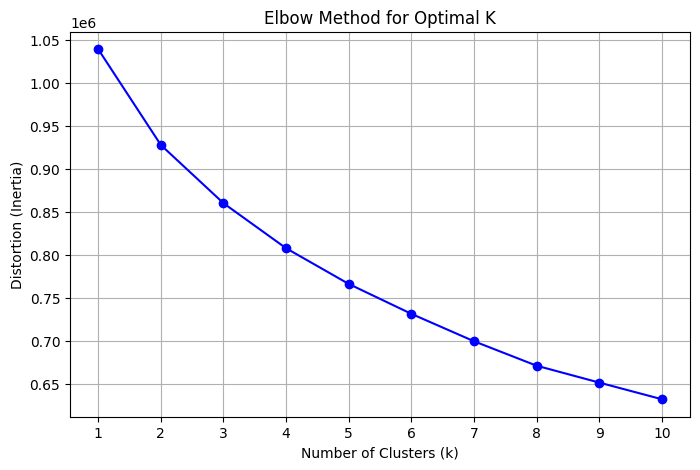

[1039541.9999999963,
 928084.738868095,
 860296.6458317225,
 807860.8064809764,
 766312.3463857181,
 731515.2963447301,
 699580.4088821635,
 671125.7405968898,
 651463.962734736,
 632092.015363103]

In [17]:
apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
        'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
ue.elbow_method(df, apps)
